In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize


import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/mnist', kind='t10k')

#n = 30000
#np.random.seed(6333)
#ids = np.random.choice(range(60000),n)
#X_train, y_train = X_train[ids], y_train[ids]

n = X_train.shape[0]


X_train = X_train.astype(np.double)
X_train = X_train/(np.max(X_train))
print(X_train.dtype)

classes = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9']

print(y_train)
print(X_train.shape, y_train.shape)
  

n_neighbors= 30
n_components = 2
MIN_DIST = 0.1
    
%matplotlib notebook

%load_ext autoreload
%autoreload 2

float64
[5 0 4 ... 5 6 8]
(60000, 784) (60000,)


/home/ponir/pyTorch1.9/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


<IPython.core.display.Javascript object>


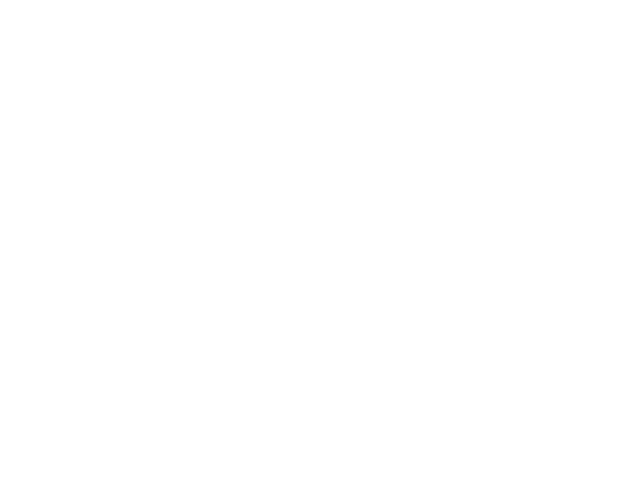

In [2]:
import umap

ump = umap.UMAP(n_neighbors=n_neighbors,
        min_dist=MIN_DIST,
        n_components=n_components,
        random_state=100,
        metric= 'euclidean')

y_umap_mapper = ump.fit(X_train)
y_umap = y_umap_mapper.embedding_

plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.01, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)


<IPython.core.display.Javascript object>


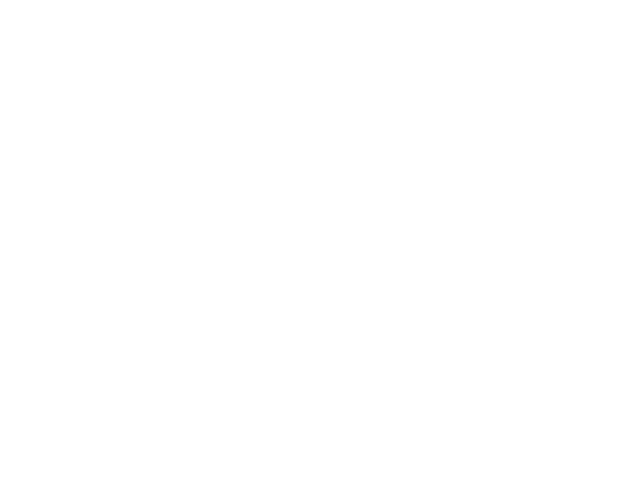

In [3]:
plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.01, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

In [4]:
np.random.seed(23423)

rand_perm = np.random.permutation(n)

X_train_rp = X_train[rand_perm]
y_train_rp = y_train[rand_perm]

nA = 10000
nB = 25000
nC = 25000

SETA = X_train_rp[:nA]
y_SETA = y_train_rp[:nA]
SETB = X_train_rp[nA:nA+nB]
y_SETB = y_train_rp[nA:nA+nB]
SETC = X_train_rp[nA+nB:nA+nB+nC]
y_SETC = y_train_rp[nA+nB:nA+nB+nC]

data1 = np.concatenate((SETA, SETB))
data2 = np.concatenate((SETA, SETC))

print(SETA.shape, SETB.shape, SETC.shape)

(10000, 784) (25000, 784) (25000, 784)


In [5]:
D1 = np.concatenate((SETA, SETB))
D2 = np.concatenate((SETA, SETC))

slices = [D1, D2]

relation_dict = {i:i for i in range(len(SETA))}
relation_dicts = [relation_dict]
#print(relation_dict)

In [6]:
np.random.seed(100)
aligned_mapper = umap.AlignedUMAP(n_neighbors=n_neighbors,
                                  random_state=42).fit(slices, relations=relation_dicts)

In [7]:
embA = aligned_mapper.embeddings_[0][0:10000]
embB = aligned_mapper.embeddings_[0][10000:]
embA_C = aligned_mapper.embeddings_[1][:10000]
embC = aligned_mapper.embeddings_[1][10000:]

<IPython.core.display.Javascript object>


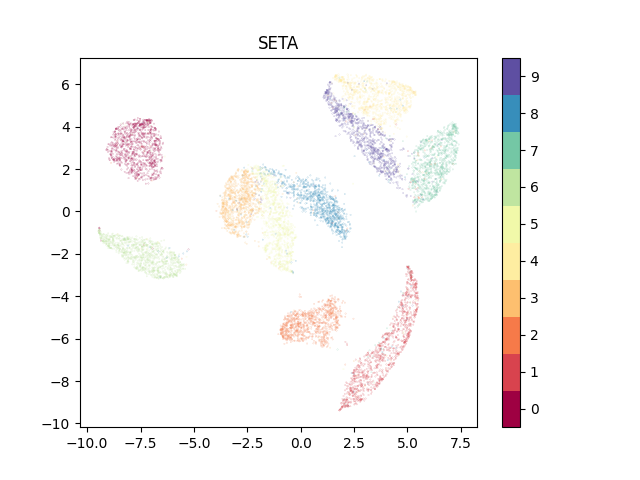

(10000, 2)


<IPython.core.display.Javascript object>


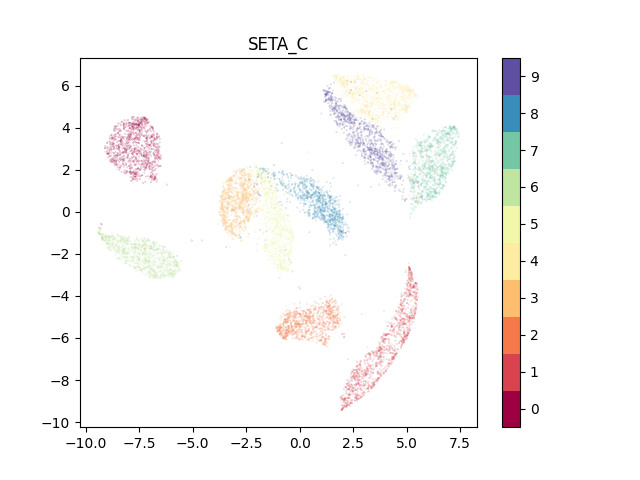

<IPython.core.display.Javascript object>


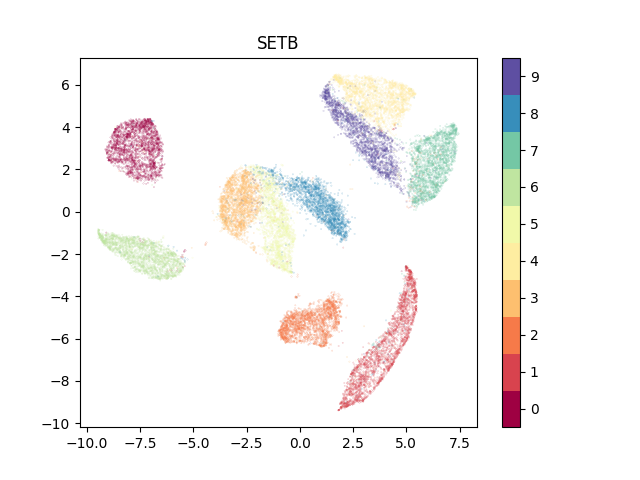

(25000, 2)


<IPython.core.display.Javascript object>


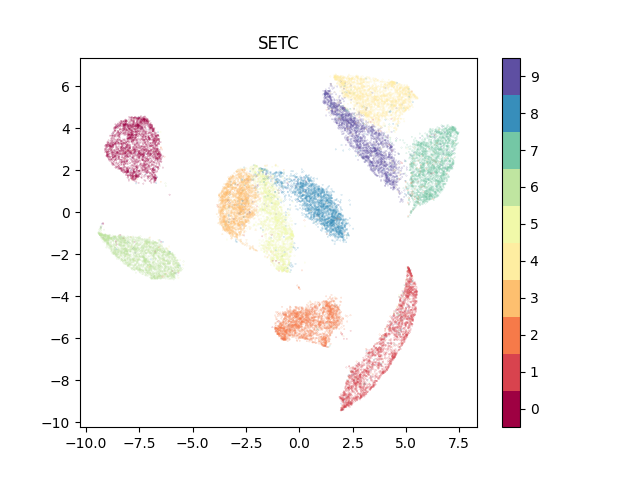

(25000, 2)


In [8]:
%matplotlib notebook

plt.figure()
plt.title('SETA')
print(embA.shape)
plt.scatter(embA[:,0], embA[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

plt.figure()
plt.title('SETA_C')
plt.scatter(embA_C[:,0], embA_C[:,1], c=y_SETA, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)


plt.figure()
plt.title('SETB')
print(embB.shape)
plt.scatter(embB[:,0], embB[:,1], c=y_SETB, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

plt.figure()
plt.title('SETC')
print(embC.shape)
plt.scatter(embC[:,0], embC[:,1], c=y_SETC, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)


<IPython.core.display.Javascript object>


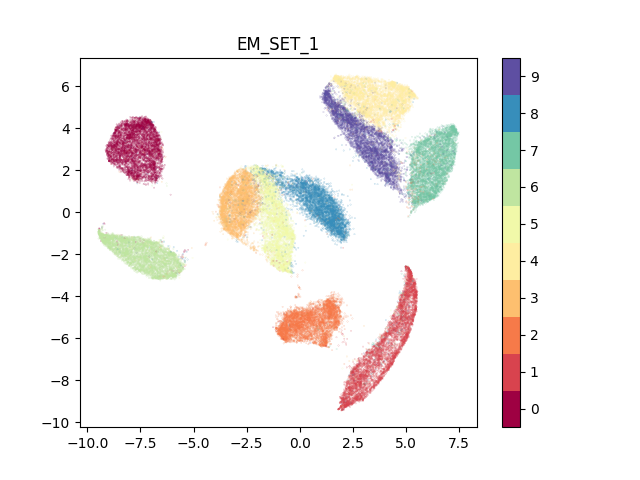

(25000, 2)


<IPython.core.display.Javascript object>


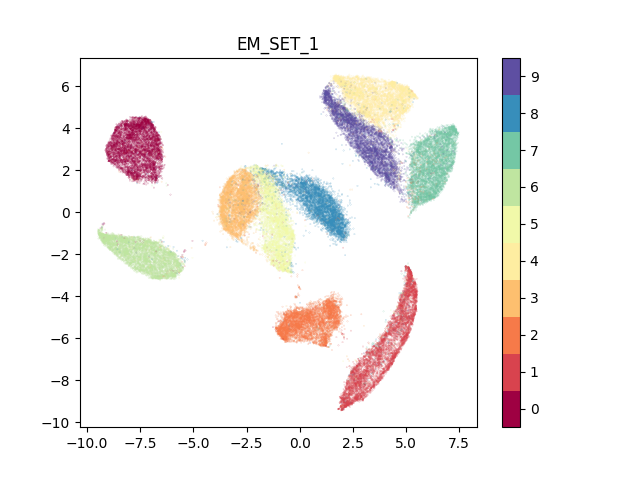

(25000, 2)


In [9]:
emb_set1 = np.concatenate((embA, embB, embC))
y_emb_set1 = np.concatenate((y_SETA, y_SETB, y_SETC))


plt.figure()
plt.title('EM_SET_1')
print(embC.shape)
plt.scatter(emb_set1[:,0], emb_set1[:,1], c=y_emb_set1, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

emb_set2 = np.concatenate((embA_C, embB, embC))
y_emb_set2 = np.concatenate((y_SETA, y_SETB, y_SETC))


plt.figure()
plt.title('EM_SET_1')
print(embC.shape)
plt.scatter(emb_set2[:,0], emb_set2[:,1], c=y_emb_set1, s=0.01, cmap='Spectral')
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

In [10]:
import numba
from numba import prange

@numba.jit(nopython=True, parallel=True)
def get_first_order_graph(X,n_neighbors):
    
    N = X.shape[0]
    
    dist = np.zeros((N, N), dtype=np.float32)
    #euclidean_distances(X_train, squared = False)

    sort_idx = np.zeros((N,n_neighbors), dtype=np.int32)
    
    for i in range(N):
        if (i+1)%10000 == 0:
            print('Completed ', i+1, ' of ', N)
        
        for j in prange(i+1,N):
            dist[i,j] = np.sum( (X[i]-X[j])**2 )
            dist[j,i] = dist[i,j]
        
        sort_idx[i,:] = np.argsort(dist[i,:])[1:n_neighbors+1]
    
    return sort_idx, dist

@numba.jit(nopython=True, parallel=True)
def my_trustworthiness(Y,sort_idx,K):
    N = Y.shape[0]

    val = 0.0
    for i in prange(N):
        dist = np.sum((Y - Y[i,:])**2,axis=1)
        
        #print(dist.shape)
        
        sort_idy = np.argsort(dist)[1:]
        for j in prange(K):
            r_0 = np.argwhere(sort_idy[j]==sort_idx[i,:])
            #print(i, r_0, sort_idx[i,j])
            #print(sort_idy)
            r = r_0[0,0] 
            #print(i,r)
            #print(sort_idx[i,j])
            #print(sort_idy)
            r_v = r - K + 1
            if r_v>0:
                val += r_v
        #print(val)
    #print(val)
    val = val * 2.0 / ( N*K * (2*N - 3*K - 1.0))
    
    #print(val)
    
    return 1 - val


In [11]:
'''
k_dense = 50
k_nn = 5

Com_set = np.concatenate((SETA,SETB,SETC))

sort_idx, _ = get_first_order_graph(Com_set,n_neighbors=Com_set.shape[0]-1)
'''

'\nk_dense = 50\nk_nn = 5\n\nCom_set = np.concatenate((SETA,SETB,SETC))\n\nsort_idx, _ = get_first_order_graph(Com_set,n_neighbors=Com_set.shape[0]-1)\n'

In [12]:
'''
T1 = my_trustworthiness(np.concatenate((embA,embB,embC)),sort_idx,k_nn)
T2 = my_trustworthiness(np.concatenate((embA_C,embB,embC)),sort_idx,k_nn)

print(T1, T2)
'''

'\nT1 = my_trustworthiness(np.concatenate((embA,embB,embC)),sort_idx,k_nn)\nT2 = my_trustworthiness(np.concatenate((embA_C,embB,embC)),sort_idx,k_nn)\n\nprint(T1, T2)\n'

In [13]:
from scipy.spatial import procrustes

D = procrustes(embA, embA_C)


print(D[2])

0.0017713308486224455


In [14]:
'''
from sklearn.manifold import trustworthiness

T1 = trustworthiness(Com_set,emb_set1)
'''

'\nfrom sklearn.manifold import trustworthiness\n\nT1 = trustworthiness(Com_set,emb_set1)\n'

In [15]:
#print(T1)

In [16]:
with open('MNIST_AlignedUMAP.npy', 'wb') as f:
    np.save(f, embA)
    np.save(f, embA_C)
    np.save(f, embB)
    np.save(f, embC)